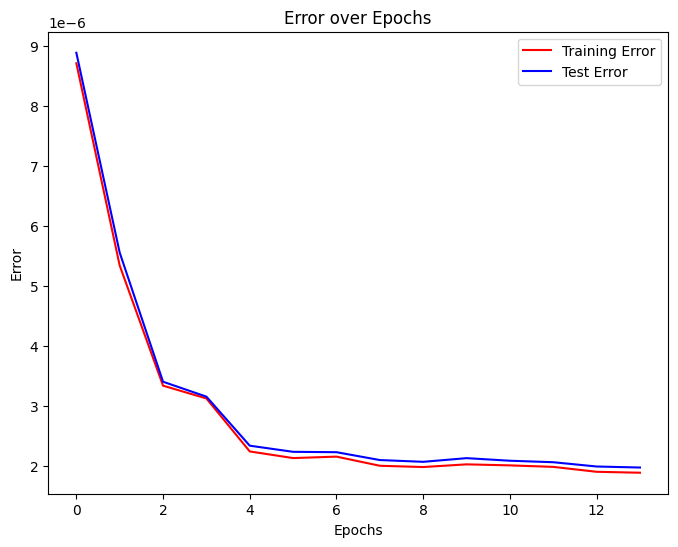

In [2]:
# Author: Angel J. Haro

import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    # ReLU`
    def ReLU(Z):
        return np.maximum(Z, 0)

    def ReLU_deriv(Z):
        return Z > 0

    def softmax(Z):
        A = np.exp(Z) / sum(np.exp(Z))
        return A

    # Sigmoid`
    def sigmoid(Z):
        return 1 / (1 + np.exp(-Z))

    def sigmoid_derivative(Z):
        s = sigmoid(Z)
        return s * (1 - s)

    # Tanh`
    def tanh(Z):
        return np.tanh(Z)

    def tanh_derivative(Z):
        return 1 - np.tanh(Z)**2


    def forward(self, x):
        # Forward pass
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = np.tanh(self.z1)  # Hidden layer uses tanh
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        output = self.z2  # No activation function (linear) for the output layer for regression
        return output

    def backward(self, x, y, output, learning_rate):
        # Backward pass and weight update
        output_error = y - output
        output_delta = output_error

        hidden_error = output_delta.dot(self.w2.T)
        hidden_delta = hidden_error * (1 - np.tanh(self.z1)**2)

        self.w2 += self.a1.T.dot(output_delta) * learning_rate
        self.b2 += np.sum(output_delta, axis=0) * learning_rate
        self.w1 += x.T.dot(hidden_delta) * learning_rate
        self.b1 += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, x, y, x_val, y_val, epochs, learning_rate, early_stopping_rounds=None):
        training_errors = []
        validation_errors = []
        best_val_error = float('inf')
        rounds_without_improvement = 0
        
        for epoch in range(epochs):
            # Shuffle the training data for stochastic gradient descent
            p = np.random.permutation(len(x))
            x_shuffled, y_shuffled = x[p], y[p]

            for i in range(len(x_shuffled)):
                output = self.forward(x_shuffled[i:i+1])
                self.backward(x_shuffled[i:i+1], y_shuffled[i:i+1], output, learning_rate)

            # Calculate and store training error for plotting
            output = self.forward(x)
            error = np.mean(np.square(y - output))
            training_errors.append(error)
            
            # Calculate validation error
            val_output = self.forward(x_val)
            val_error = np.mean(np.square(y_val - val_output))
            validation_errors.append(val_error)
            
            # Check for early stopping
            if val_error < best_val_error:
                best_val_error = val_error
                rounds_without_improvement = 0
            else:
                rounds_without_improvement += 1
            
            if early_stopping_rounds and rounds_without_improvement == early_stopping_rounds:
                print(f"Stopping early after {epoch+1} epochs")
                break

        return training_errors, validation_errors
 
    def save_weights(self, filename):
        with open(filename, 'w') as f:
            f.write('Weights from input to hidden layer:\n')
            f.write(str(self.w1))
            f.write('\nBiases for hidden layer:\n')
            f.write(str(self.b1))
            f.write('\nWeights from hidden to output layer:\n')
            f.write(str(self.w2))
            f.write('\nBiases for output layer:\n')
            f.write(str(self.b2))


# Example usage:
input_size = 3  # for r, g, b
hidden_size = 10  # can be tuned
output_size = 1  # only red output

# Assuming each row in 'red-fabric.txt' is [r, g, b]
data = np.loadtxt('red-fabric.txt')

# Input features (RGB values)
X = data[:, :3]

# Output labels (only the red component)
y = data[:, 0].reshape(-1, 1)  # reshape for compatibility with the network

# Split the data into training and testing sets (adjust the ratio as needed)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize and train the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size)
epochs = 14
learning_rate = 0.01

# Train the network and get training and validation errors
training_errors, validation_errors = nn.train(X_train, y_train, X_test, y_test, epochs, learning_rate)

# Save the final weights after training
nn.save_weights('final_weights.txt')

# Evaluate the network on the test set after training to get the test error
test_output = nn.forward(X_test)
test_error = np.mean(np.square(y_test - test_output))

# Plot the training and test errors
plt.figure(figsize=(8, 6))
plt.plot(training_errors, label='Training Error', color='red')
plt.plot(validation_errors, label='Test Error', color='blue')  # assuming validation_errors is actually the test error
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error over Epochs')

plt.legend()
plt.show()